
# Applied Statistics Tasks

---

Assessment Repository

Task Assessment for <em><strong>Applied Statistics</strong></em> module on <em><strong>Higher Diploma in Science in Computing in Data Analytics at ATU</strong></em>. 

Submitted by: Agnieszka Waszczuk 

Lecturer: Ian McLoughlin

---
---

## Contents

Software Libraries

Task 1 - Permutations and Combinations

Task 2 - Numpy's Normal Distribution

Task 3 - $t$-Test Calculation

Task 4 - ANOVA

Reference 

### Software Libraries


* [Pandas](https://pandas.pydata.org/) is an open source data analysis and manipulation tool,
built on top of the Python programming language.

* [Seborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

* [Matplotlib](https://matplotlib.org/)  is a comprehensive library for creating static, animated, and interactive visualizations in Python. Customize visual style and layout. Create publication quality plots.


* [NumPy](https://numpy.org/)  is a Python library that used for numerical calculations, mathematical functions, random number generators, commonly used with Pandas.

* [SciPy](https://scipy.org/ ) a statistical tool that performs analysis of variance (ANOVA) to analyze differences between groups.

---
---



### Task 1: Permutations and Combinations
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

<em><strong>Introduction</strong></em>


The Lady Tasting Tea experiment is a famous statistical hypothesis test developed by Sir Ronald A. Fisher in the 1920s. The experiment was designed to test the claim that a woman can tell the difference between tea and milk being added first to a cup based solely on taste.

In a typical situation, a woman is presented with several cups of tea, some with milk and others with tea. She is tasked with correctly identifying which cups had milk added first, based on her tasting ability. The experiment assesses whether her success rate is significantly better than random guessing.



In this task, we extend the original experiment. The setup involves 12 cups of tea:

* 6 cups have the milk poured first
* 6 cups have the tea poured first

In [46]:
# Importing libraries. 

# Mathematical functions.
import math

# Data frames.
import pandas as pd
import os

# Numerical structures and operations.
import numpy as np

# Random selections.
import random

# Permutations and combinations.
import itertools

# Plotting.
import matplotlib.pyplot as plt

The Null Hypothesis
* The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

* The lady is selecting the four cups from the eight cups at random.

Alternative Hypothesis
The lady can tell the difference.

In [41]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk first.
no_cups_milk_first = 6

# Number of cups of tea with tea first.
no_cups_tea_first = 6

In [42]:
# Number of ways of selecting 6 cups from 12.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

In [43]:
# No of ways of shuffling 6 cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [44]:
# Total number of ways of selecting 6 cups from eight, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

In [45]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

In [20]:
# Number of cups of tea in total.
n = 12

In [21]:
# Number of cups of tea with milk in first.
k = 6

In [34]:
# 12 factorial.
math.factorial(n)

479001600

In [36]:
# 6 factorial.
math.factorial(n - k)

720

In [25]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

In [26]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Import the <code>itertools</code> module, which provides the combinations function for generating all possible selections of a given size from a collection.

In [32]:
import itertools

# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Number of combinations.
len(combs)

924

In [48]:
# Select 6 cups at random to put milk in first.
labels_milk = random.sample(labels, 6)

# Add Sort.
labels_milk.sort()

# Show.
labels_milk


#Ref:https://docs.python.org/3/library/random.html#random.sample

[0, 1, 4, 6, 7, 10]

In [49]:
# Turn labels_milk into a set.
set(labels_milk)

{0, 1, 4, 6, 7, 10}

In [50]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1, 4} 3
(0, 1, 2, 3, 4, 6) {0, 1, 4, 6} 4
(0, 1, 2, 3, 4, 7) {0, 1, 4, 7} 4
(0, 1, 2, 3, 4, 8) {0, 1, 4} 3
(0, 1, 2, 3, 4, 9) {0, 1, 4} 3
(0, 1, 2, 3, 4, 10) {0, 1, 10, 4} 4
(0, 1, 2, 3, 4, 11) {0, 1, 4} 3
(0, 1, 2, 3, 5, 6) {0, 1, 6} 3
(0, 1, 2, 3, 5, 7) {0, 1, 7} 3
(0, 1, 2, 3, 5, 8) {0, 1} 2
(0, 1, 2, 3, 5, 9) {0, 1} 2
(0, 1, 2, 3, 5, 10) {0, 1, 10} 3
(0, 1, 2, 3, 5, 11) {0, 1} 2
(0, 1, 2, 3, 6, 7) {0, 1, 6, 7} 4
(0, 1, 2, 3, 6, 8) {0, 1, 6} 3
(0, 1, 2, 3, 6, 9) {0, 1, 6} 3
(0, 1, 2, 3, 6, 10) {0, 1, 10, 6} 4
(0, 1, 2, 3, 6, 11) {0, 1, 6} 3
(0, 1, 2, 3, 7, 8) {0, 1, 7} 3
(0, 1, 2, 3, 7, 9) {0, 1, 7} 3
(0, 1, 2, 3, 7, 10) {0, 1, 10, 7} 4
(0, 1, 2, 3, 7, 11) {0, 1, 7} 3
(0, 1, 2, 3, 8, 9) {0, 1} 2
(0, 1, 2, 3, 8, 10) {0, 1, 10} 3
(0, 1, 2, 3, 8, 11) {0, 1} 2
(0, 1, 2, 3, 9, 10) {0, 1, 10} 3
(0, 1, 2, 3, 9, 11) {0, 1} 2
(0, 1, 2, 3, 10, 11) {0, 1, 10} 3
(0, 1, 2, 4, 5, 6) {0, 1, 4, 6} 4
(0, 1, 2, 4, 5, 7) {0, 1, 4, 7} 4
(0, 1, 2, 4, 5, 8) {0, 1, 4} 3
(0, 1, 2, 4,

In [51]:
# Show the overlaps.
print(no_overlaps)

[3, 4, 4, 3, 3, 4, 3, 3, 3, 2, 2, 3, 2, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 4, 3, 3, 4, 3, 5, 4, 4, 5, 4, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 3, 3, 4, 3, 5, 4, 4, 5, 4, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 5, 4, 4, 5, 4, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 5, 5, 6, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 4, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 5, 4, 5, 4, 5, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 2, 2, 3, 2, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 2, 

In [59]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

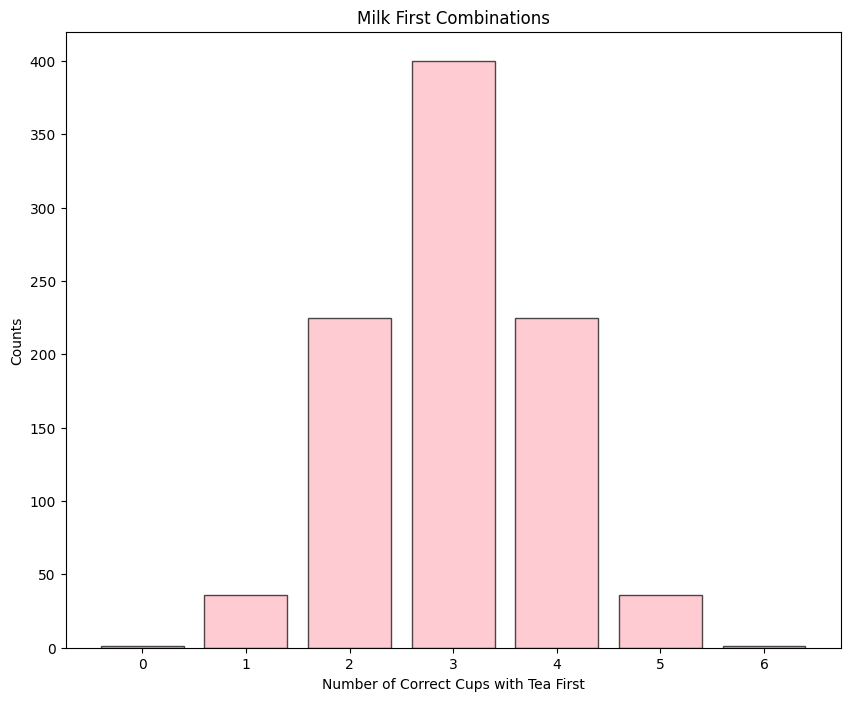

In [ ]:
# Create a figure.
fig, ax = plt.subplots(figsize=(10, 8))

# Adding title.
plt.title('Milk First Combinations')

# Adding lables.
ax.set_ylabel('Counts')
ax.set_xlabel('Number of Correct Cups with Tea First')

# Bar chart.
ax.bar(counts[0], counts[1], color='lightpink', edgecolor='black', alpha = 0.7);

In [68]:
# The probability that she (randomly) selects the 6 correct cups.
1 / ways

0.0010822510822510823

In [69]:
# The probability that she (randomly) selects at least 5 correct cups.
(36 + 1) / ways

0.04004329004329004

In [33]:
# Function to calculate combinations. 
def comb(n, k):
    return math.comb(n, k)

# Total number of ways to choose 6 cups out of 12.
total_outcomes = comb(12, 6)

# Probability of guessing all 6 cups correctly.
correct_6 = 1 / total_outcomes

# Probability of guessing exactly 5 cups correctly .
correct_5 = (comb(6, 5) * comb(6, 1)) / total_outcomes

# Probability of guessing at least 5 cups correctly.

# Probability of guessing exactly 4 cups correctly.
correct_4 = (comb(6, 4) * comb(6, 2)) / total_outcomes

# Probability of guessing at least 4 cups correctly.
at_least_4_correct = correct_4 + correct_5 + correct_6

# Results. 
correct_6, at_least_5_correct, at_least_4_correct


(0.0010822510822510823, 0.04004329004329004, 0.28354978354978355)

<em><strong>Summary:</strong></em>


* The probability of correctly guessing 6 cups is very low (0.00108) is 0.108%.
* Probability of guessing at least 5 cups is 0.04004 (4.00%).
* The probability of making at least one error but still getting 4 or more correct cups is about 28%.

The probability of correctly selecting all 6 cups is very low, but allowing up to 1 error increases the probability to about 4%.

---
---
### Task 2: numpy's Normal Distribution
In this task you will assess whether <code>numpy.random.normal()</code> properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean <code>10.0</code> and standard deviation <code>3.0</code>.

Use the <code>scipy.stats.shapiro()</code> function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

<em><strong>Normal distribution</strong>

In probability theory and statistics, a normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is: 

<img src="photo6.png" align="center">

The parameter 
μ is the mean or expectation of the distribution (and also its median and mode), while the parameter 
σ 
2
 is the variance. The standard deviation of the distribution is 
σ
. A random variable with a Gaussian distribution is said to be normally distributed, and is called a normal deviate.



<img src="Normal-Distribution.png">


In [17]:
# Imprting library.

# Random selection. 
# https://numpy.org/doc/stable/reference/?v=20241021203608
import numpy as np

# Building distributions.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Plotting.
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as plt

Generates a sample of 10000 values using <code>numpy.random.normal()</code> with a mean of <code>10.0</code> and a standard deviation of <code>3.0</code>.

In [18]:
# Normal distribution.
mean = 10.0
std_dev = 3.0
sample_size = 100000

In [19]:
# Sample using numpy's normal function.
sample = np.random.normal(mean, std_dev, sample_size)

<em><strong>Shapiro-Wilk Test</strong>

The Shapiro–Wilk test is a test of normality. It was published in 1965 by Samuel Sanford Shapiro and Martin Wilk.  [Wikipedia](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

```bash
The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population – consequently, a data set with a p value more than the .05 alpha value fails to reject the null hypothesis that the data is from a normally distributed population).
```




 For the task, I use Shapiro-Wilk test using <code>scipy.stats.shapirol()</code> ) to check for normality.

In [20]:
# Creating Shapiro-Wilk test for normality.
# https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
shapiro_test = stats.shapiro(sample)

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:
# Print result.
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
print(f"p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test Statistic: 0.9999833685356995
p-value: 0.9711310045238125


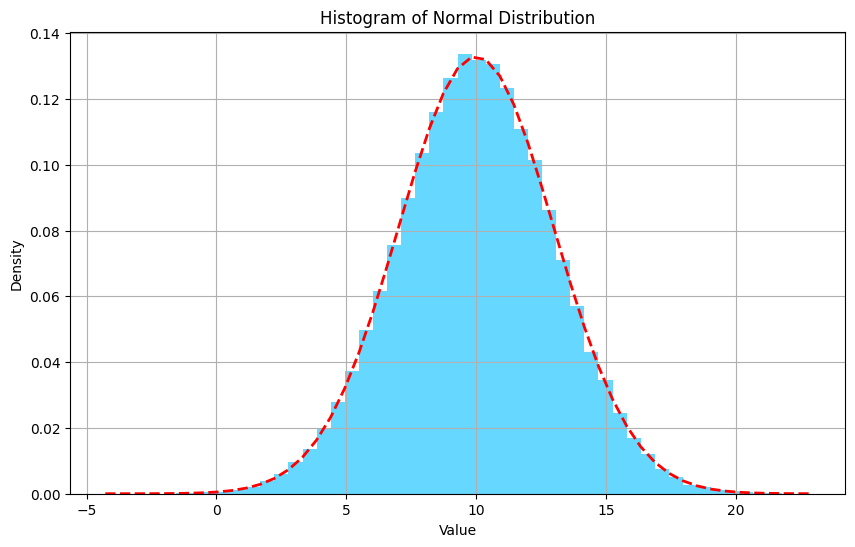

In [23]:
# Plot a histogram. 
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(sample, bins=50, density=True, alpha=0.6, color='deepskyblue')

# Plot normal distribution. 
pdf = stats.norm.pdf(bins, mean, std_dev)
plt.plot(bins, pdf, 'r--', linewidth=2)

# Adding labels and title.
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
# Adding grid.
plt.grid()
# Display the plot.
plt.show()

 <em><strong>Interpretation</strong></em>

The result of Sharpio-Wilk test:
* Test Statistic: 0.9999833685356995
* p-value: 0.9711310045238125

The p-value 0.971 is significantly higher than the alpha level 0.05. This means that we do not reject the null hypothesis that the data are normally distributed. The visualisation of the data in a histogram plot confirms this. 

---
---
#### Task 3: t-Test Calculation
Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.



| Patient ID | 0 | 1 | 2 |3 |4 |5 |6 |7 |8 |9 |
| :------------------- | :----------: | ----------: |----------: |----------: |----------: |----------: |----------: |----------: |----------: |----------: |
| Before             | 63     | 68       |70       |64     |74       |67       |70       |57       |66       |65       |
| After              | 64      | 64    |68     |64     |73     |70     |72     |54     |61     |63     |



 * Calculate the t-statistic based on this data set, using Python. 
 * Compare it to the value given by <code>scipy.stats</code>. 
 * Explain your work and list any sources used.

<em><strong>T-Test </strong></em>

William Sealy Gosset, a statistician at Guinness Brewery, developed the t-test and published it in 1908 under the pseudonym "Student" to comply with company policies. His work addressed challenges with small sample sizes, such as assessing barley quality. While Gosset introduced the t-test, Ronald Fisher popularized the method, establishing it as a cornerstone of modern statistics.

Student's $t$-test is a statistical method used to assess whether a difference in responses between two groups is statistically significant. It is based on the Student's t-distribution under the null hypothesis and is particularly useful when the scaling factor of the test statistic is unknown. Often used to compare the means of two populations, the t-test is particularly effective for smaller data sets where the Z-test may not be appropriate. As the size of the data set increases, the results of the t-test converge to the results of the Z-test.

Ref: https://en.wikipedia.org/wiki/Student%27s_t-test

Ref: https://en.wikipedia.org/wiki/T-statistic



In [2]:
# Import libraries.
# https://numpy.org/doc/stable/reference/?v=20241021203608

import numpy as np
from scipy import stats

# Import plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

# Data frames.
import pandas as pd

#### Define the data for both "before" and "after" measurements

In [3]:
# Cratete data frame.
data = {'patient_id': [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'before':[ 63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
        'after': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]}

df = pd.DataFrame(data)    

df

,patient_id,before,after
0,0,63,64
1,1,68,64
2,2,70,68
3,3,64,64
4,4,74,73
5,5,67,70
6,6,70,72
7,7,57,54
8,8,66,61
9,9,65,63


In [4]:
# Display information about the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   patient_id  10 non-null     int64
 1   before      10 non-null     int64
 2   after       10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [5]:
# Printing summary of dataset.
df.describe()

,patient_id,before,after
count,10.00000,10.00000,10.000000
mean,4.50000,66.40000,65.300000
std,3.02765,4.64758,5.677441
min,0.00000,57.00000,54.000000
25%,2.25000,64.25000,63.250000
50%,4.50000,66.50000,64.000000
75%,6.75000,69.50000,69.500000
max,9.00000,74.00000,73.000000


Hypothesise for <em><strong>t-Test </strong></em>: 

* <em><strong>Null Hypothesis</strong></em> ($H0$ ):there is no change in mean resting heart rate, so the mean difference is zero. 
* <em><strong>Alternative Hypothesis</strong></em> ($H1$):there is a change in mean resting heart rate after the exercise program

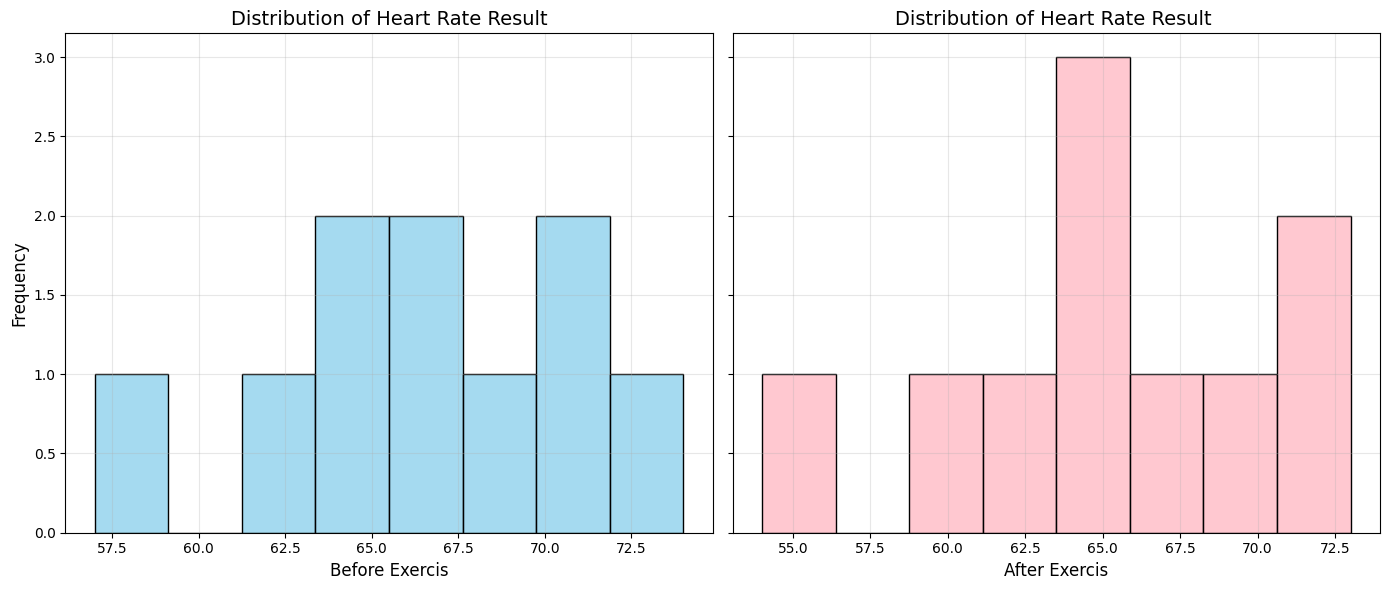

In [6]:
# Plot histograms.
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for 'before'.
sns.histplot(df['before'], bins=8, kde=False, color='skyblue', ax=axs[0])
axs[0].set_title('Distribution of Heart Rate Result', fontsize=14)
axs[0].set_xlabel('Before Exercis', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].grid(alpha=0.3)

# Histogram for 'after'.
sns.histplot(df['after'], bins=8, kde=False, color='lightpink', ax=axs[1])
axs[1].set_title('Distribution of Heart Rate Result ', fontsize=14)
axs[1].set_xlabel('After Exercis', fontsize=12)
axs[1].grid(alpha=0.3)

# Adjust layout.
plt.tight_layout()

# Add grid.
plt.grid

# Show the plots.
plt.show()

In [ ]:
# Resting heart rates before and after on two-week exercise program.
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

# Calculateting the differences.
differences = before - after

In [ ]:
# Calcutateing mean.
# https://en.wikipedia.org/wiki/Mean
mean_diff = np.mean(differences)


In [ ]:
# Standard deviation of the differences.
# https://numpy.org/doc/stable/reference/generated/numpy.std.html

std_diff = np.std(differences, ddof=1)

In [ ]:
#Calculate the sample size. 
#https://datagy.io/python-confidence-intervals/
n = len(differences)


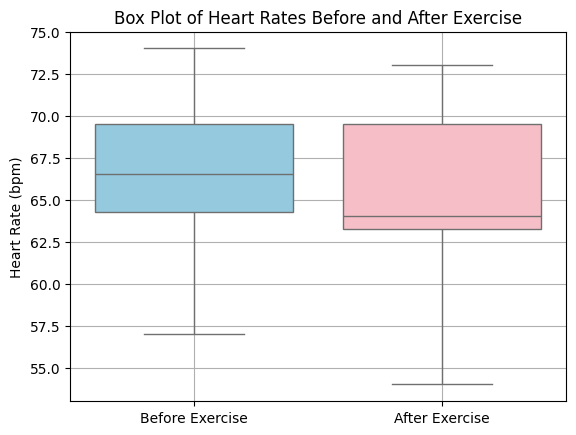

In [17]:
# Box plot.
sns.boxplot(data=[before, after],  palette=["skyblue", "lightpink"]);

# Add title.
plt.title('Box Plot of Heart Rates Before and After Exercise')

# Add lable.
plt.ylabel('Heart Rate (bpm)')
plt.xticks([0, 1], ['Before Exercise', 'After Exercise'])

# Add grid.
plt.grid(True)

# Show. 
plt.show()

#### $t$-Test 



In [ ]:
# Perform a t-test.
stats.ttest_ind(before, after)

TtestResult(statistic=np.float64(0.4740968275126808), pvalue=np.float64(0.6411310132871086), df=np.float64(18.0))

##### The $t$-statistic of 0.474 suggests that the difference between groups before and  gropu after is quite small

In [ ]:

# Calculate the t-statistic. 
# https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests
t_statistic = mean_diff / (std_diff / np.sqrt(n))

#### Results of the calculations

In [ ]:

# Printing results for t-statistic.
print("t-statistic:", t_statistic)

# Printing results for p-value.
print("p-value:", p_value)


t-statistic: 1.3372274824806283
p-value: 0.21396011317404623


In [ ]:
# Hypothesis testing
if p_value > 0.05:
    print('Accept the null hypothesis: No significant difference in heart rates.')
else:
    print('Reject the null hypothesis: Significant difference in heart rates.')

 <em><strong>Interpretation</strong></em>

The paired t-test results are as follows:
* Test Statistic:1.337
* p-value: 0.213

 The p-value suggests that there is no statistically significant difference in heart rates before and after the exercise program at typical significance levels. 

---
---
#### Task 4: ANOVA
In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

1. Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of <code>0.1</code>. Give the first sample a mean of <code>4.9</code>, the second a mean of <code>5.0</code>, and the third a mean of <code>5.1</code>.

2. Perform one-way anova on the three samples and add <code>1</code> to <code>no_type_ii</code> whenever a type II error occurs.

3. Summarize and explain your results.

<em><strong>ANOVA</strong></em> is a collection of statistical models and their associated estimation procedures used to analyze the differences among means. ANOVA was developed by the statistician Ronald Fisher. ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. In other words, the ANOVA is used to test the difference between two or more means.

Ref: https://en.wikipedia.org/wiki/Analysis_of_variance

When interpreting the results of hypothesis tests, two types of events can occur:

Type I and Type II Errors:

* <em><strong>Type I Error</strong></em> (False Positive): Rejecting the null hypothesis when it’s true.


* <em><strong>Type II Error</strong></em> (False Negative): Failing to reject the null hypothesis when it’s false.

Ref: https://www.scribbr.com/statistics/type-i-and-type-ii-errors/

In [7]:
# Import libraries.
import numpy as np
from scipy.stats import f_oneway

# Plotting. 
import matplotlib as plt

# Statistic function. 
import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as plt

Uses <code>np.random.norma</code> to generate random samples for three groups, with specified means and standard deviation.

In [8]:
# First sample.
sample_1 = np.random.normal(loc=4.9, scale=0.1, size=100)

# Second sample. 
sample_2 = np.random.normal(loc=5.0, scale=0.1, size=100)

# Third sample.
sample_3 = np.random.normal(loc=5.1, scale=0.1, size=100)

### Histogram

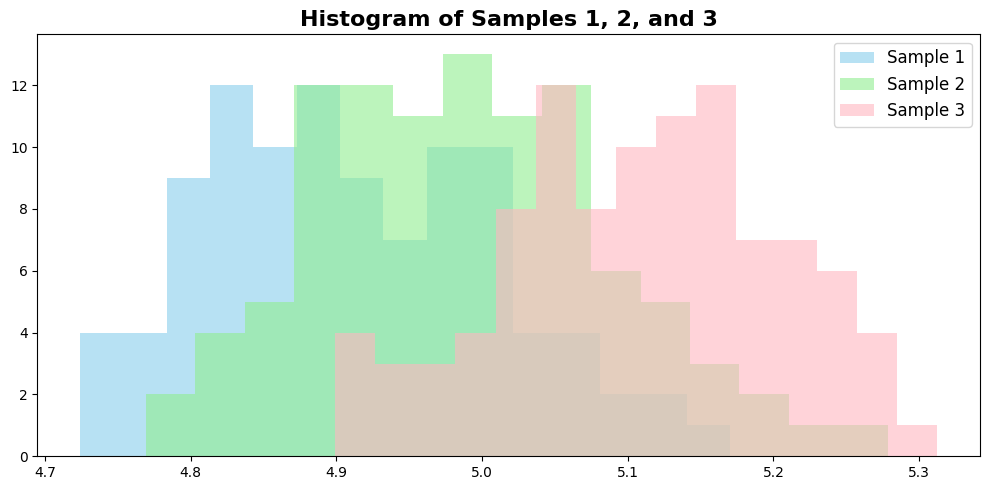

In [9]:
# Create the histogram.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_1, bins=15, alpha=0.6, label='Sample 1', color='skyblue')

# Histogram of the second sample.
ax.hist(sample_2, bins=15, alpha=0.6, label='Sample 2', color='lightgreen')

# Histogram of the third sample.
ax.hist(sample_3, bins=15, alpha=0.6, label='Sample 3', color='lightpink')

# Add title.
ax.set_title('Histogram of Samples 1, 2, and 3', fontsize=16, fontweight='bold')

# Add legend.
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()

In [10]:
# t-test on sample_1 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)


t_statistic, p_value

(np.float64(-5.553596543069277), np.float64(8.933288011024756e-08))

In [11]:
# t-test on sample_1 and sample_3.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_3)


t_statistic, p_value

(np.float64(-14.546945531439253), np.float64(4.357672415067372e-33))

In [12]:
# t-test on sample_1 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)


t_statistic, p_value

(np.float64(-5.553596543069277), np.float64(8.933288011024756e-08))

In [13]:
# t-test on sample_3 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_3, sample_2)


t_statistic, p_value

(np.float64(8.742446896627623), np.float64(9.778092440310066e-16))

$s$-Sample


In [14]:
# Number of samples.
n = 10000

In [15]:
# Show the sample labels.
print(list(range(1000)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [16]:
# Create variable 
no_type_ii = 0 

In [17]:
# Run several simulations.
for _ in range(n):
    sample_1 = np.random.normal(loc=4.9, scale=0.1, size =100)
    sample_2 = np.random.normal(loc=5.0, scale=0.1, size =100)
    sample_3 = np.random.normal(loc=5.1, scale=0.1, size =100)

Uses <code>scipy.stats.f_oneway</code> to calculate the F-statistic and p-value.

In [18]:
# Perform ANOVA.    
t_statistit, p_value = stats.f_oneway(sample_1, sample_2, sample_3)

# Show.
t_statistit, p_value


(np.float64(101.5236992327912), np.float64(2.518683844677173e-34))

In [35]:
if p_value < 0.05:
    print('The alternative hypothesis is accepted')
else:
    print('The alternative hypothesis is rejected')

The alternative hypothesis is accepted


In [40]:
# Calculate the probability of Type II error.
probability_type_ii = no_type_ii / n

# Show the results.
print(f"Number of Type II errors: {no_type_ii}")
print(f"Probability of Type II error: {probability_type_ii:.4f}")    

Number of Type II errors: 0
Probability of Type II error: 0.0000


In [41]:
# Count Type II errors.
error_type_ii = 0

# Number of samples.
n = 10000

# Loop to perform the test 
for _ in range(n):
    # Generate three samples with given means and standard deviation
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=10)
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=10)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=10)

    # One-way ANOVA
    f_statistic, p_value = stats.f_oneway(sample1, sample2, sample3)

    # Type II error
    if p_value > 0.05: 
        error_type_ii = error_type_ii + 1
    else:
        pass 

# Show the results.
probability_type_ii = error_type_ii / simulations
print(f"Number of type II errors: {error_type_ii}")
print(f"Probability of committing a type II error: {probability_type_ii:.4f}")

Number of type II errors: 286
Probability of committing a type II error: 0.0286


### Reference 


Ref: https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/

Ref:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

Ref:https://www.datacamp.com/tutorial/anova-test

Ref:https://www.scribbr.com/statistics/type-i-and-type-ii-errors/

Ref:https://www.youtube.com/watch?v=EWYzeZbchR0

Ref:https://rocklandpeakperformance.com/what-is-a-normal-distribution-in-statistics/

Ref:https://en.wikipedia.org/wiki/Normal_distribution

Ref: Shapiro, S. S .; Wilk, M. B. (1965). "An analysis of variance test for normality p. 593

Ref:https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

Ref:https://en.wikipedia.org/wiki/Student%27s_t-test

Ref:https://en.wikipedia.org/wiki/T-statistic

Ref: https://en.wikipedia.org/wiki/Mean

Ref: https://datagy.io/python-confidence-intervals/

Ref: https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests

Ref: https://en.wikipedia.org/wiki/Analysis_of_variance

Ref: https://www.scribbr.com/statistics/type-i-and-type-ii-errors/


End 